In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [5]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
train.shape
test.shape

(367, 12)

In [7]:
train['Loan_Status'].value_counts()
### To get the proportions instead of counts, we make the normalize paramter to be True
train['Loan_Status'].value_counts(normalize=True)

Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64

<Axes: xlabel='Loan_Status'>

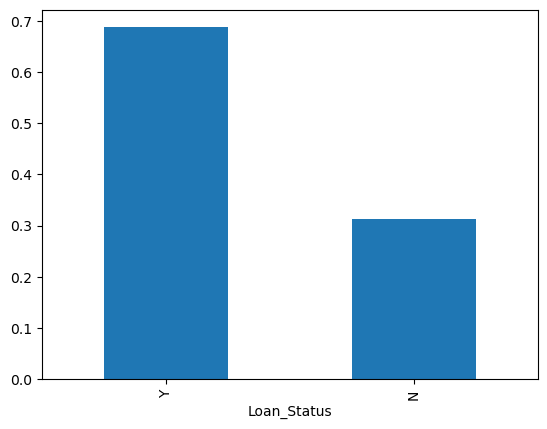

In [8]:
train['Loan_Status'].value_counts(normalize=True).plot.bar()

<Axes: title={'center': 'Gender'}, xlabel='Gender'>

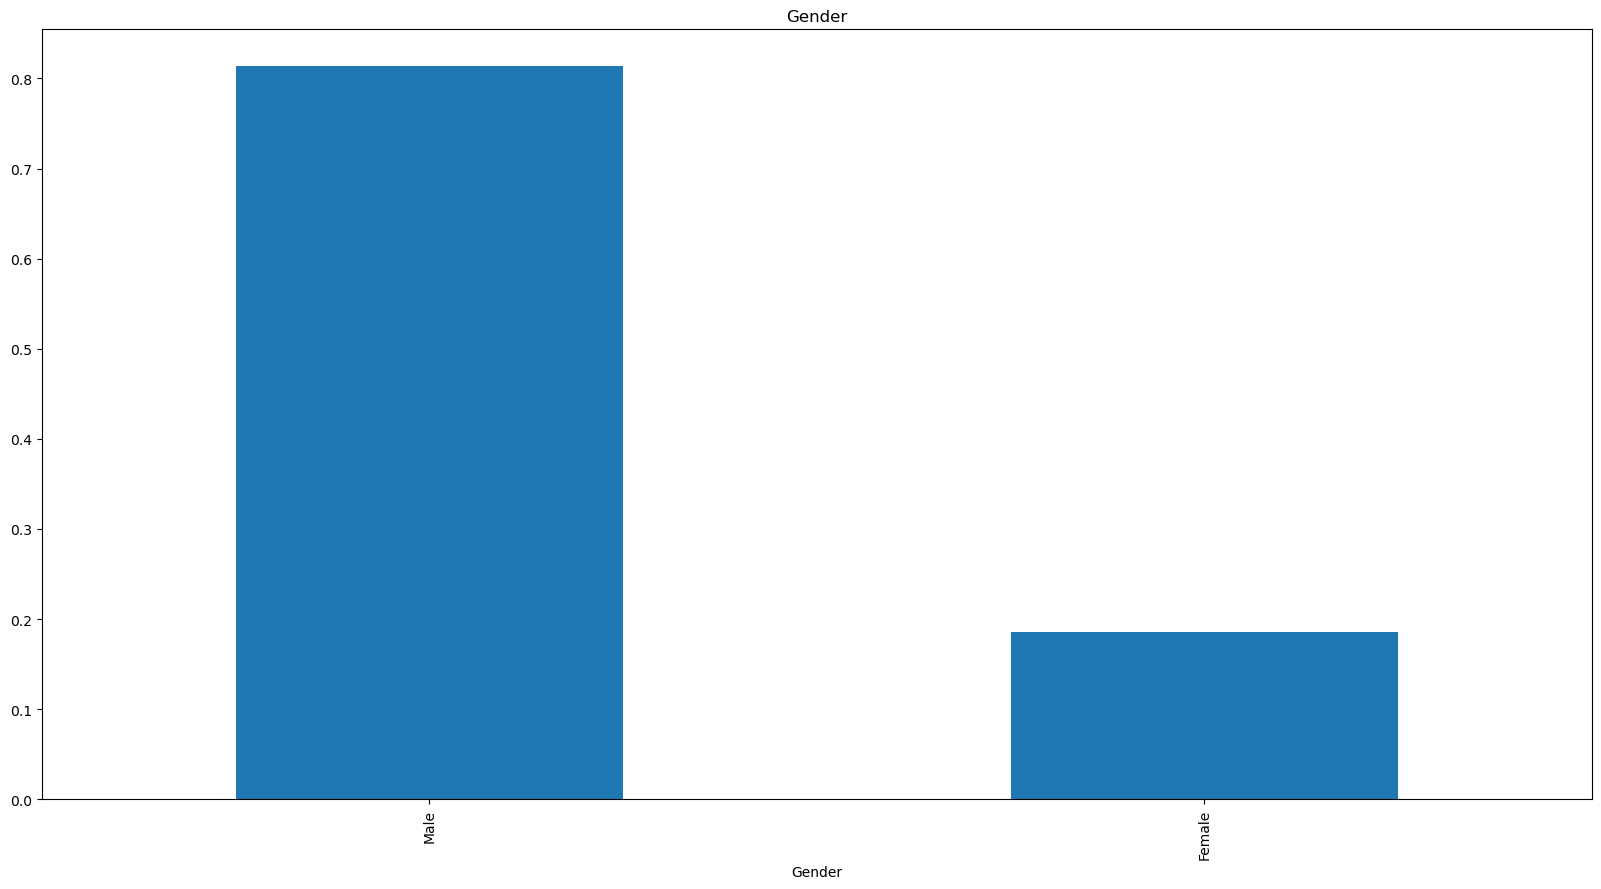

In [9]:
train['Gender'].value_counts(normalize=True).plot.bar(figsize = (20,10), title = 'Gender')

<Axes: title={'center': 'Dependents'}, xlabel='Dependents'>

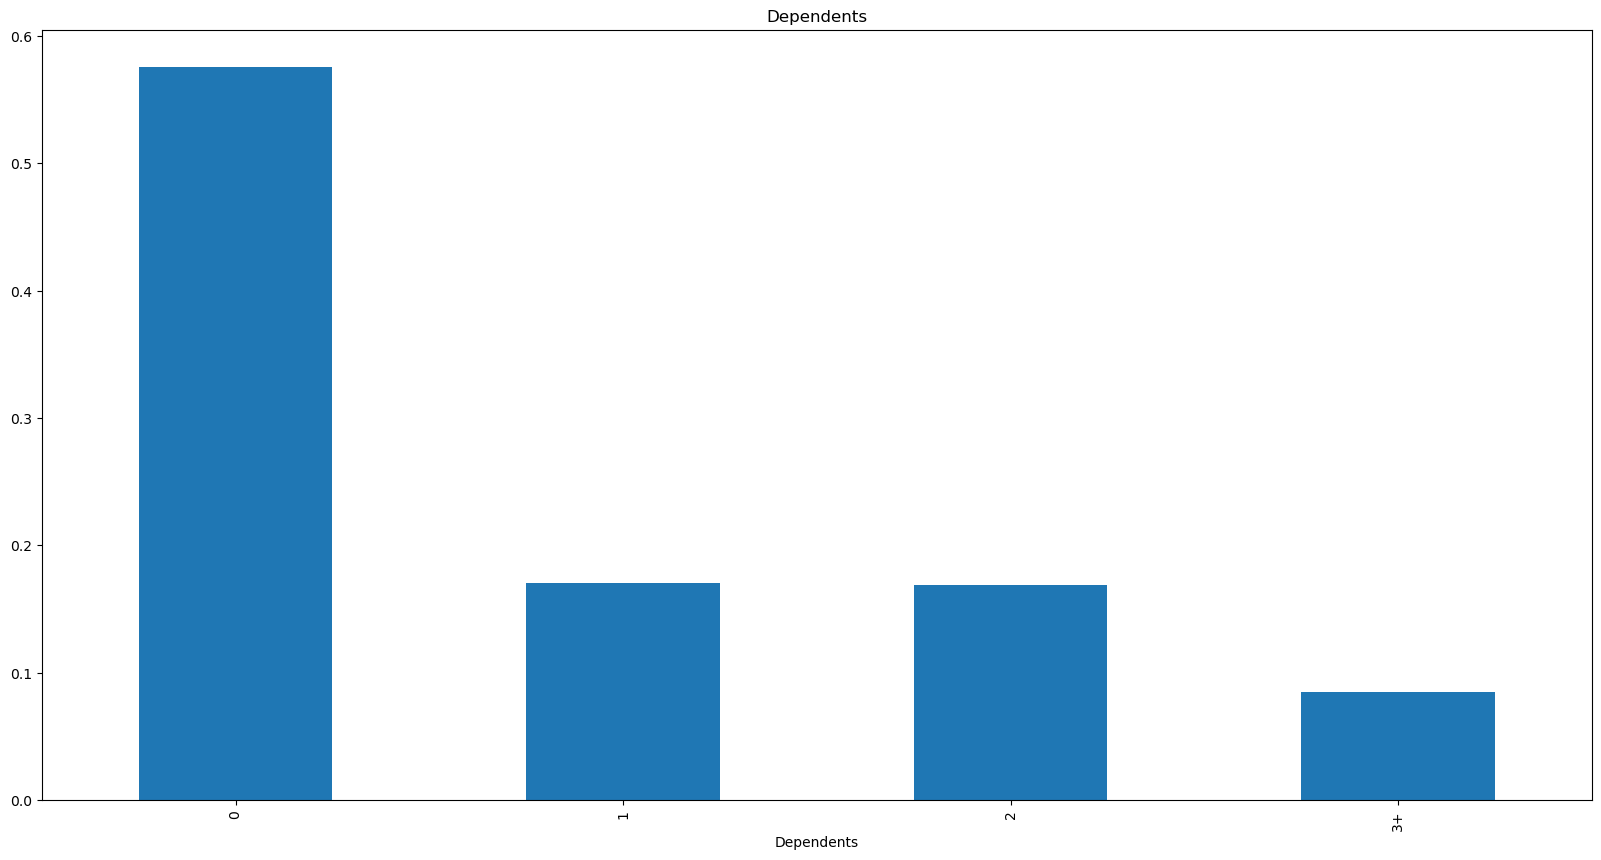

In [10]:
train['Dependents'].value_counts(normalize=True).plot.bar(figsize = (20,10), title = 'Dependents')

<Axes: title={'center': 'Education'}, xlabel='Education'>

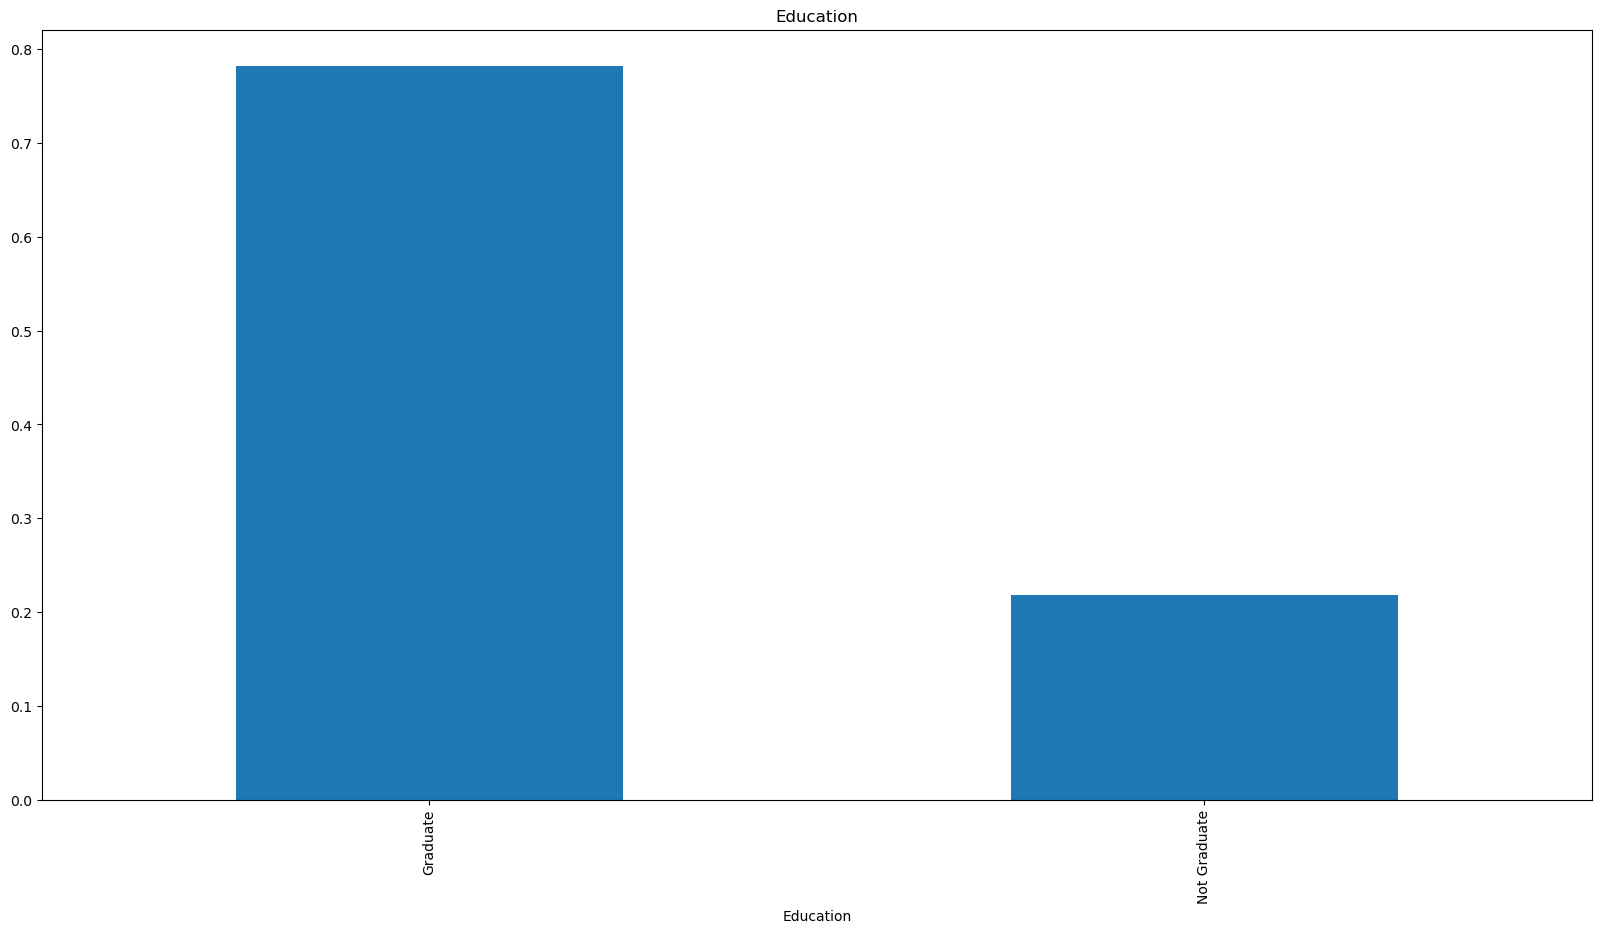

In [11]:
train['Education'].value_counts(normalize=True).plot.bar(figsize = (20,10), title = 'Education')

<Axes: title={'center': 'Property_Area'}, xlabel='Property_Area'>

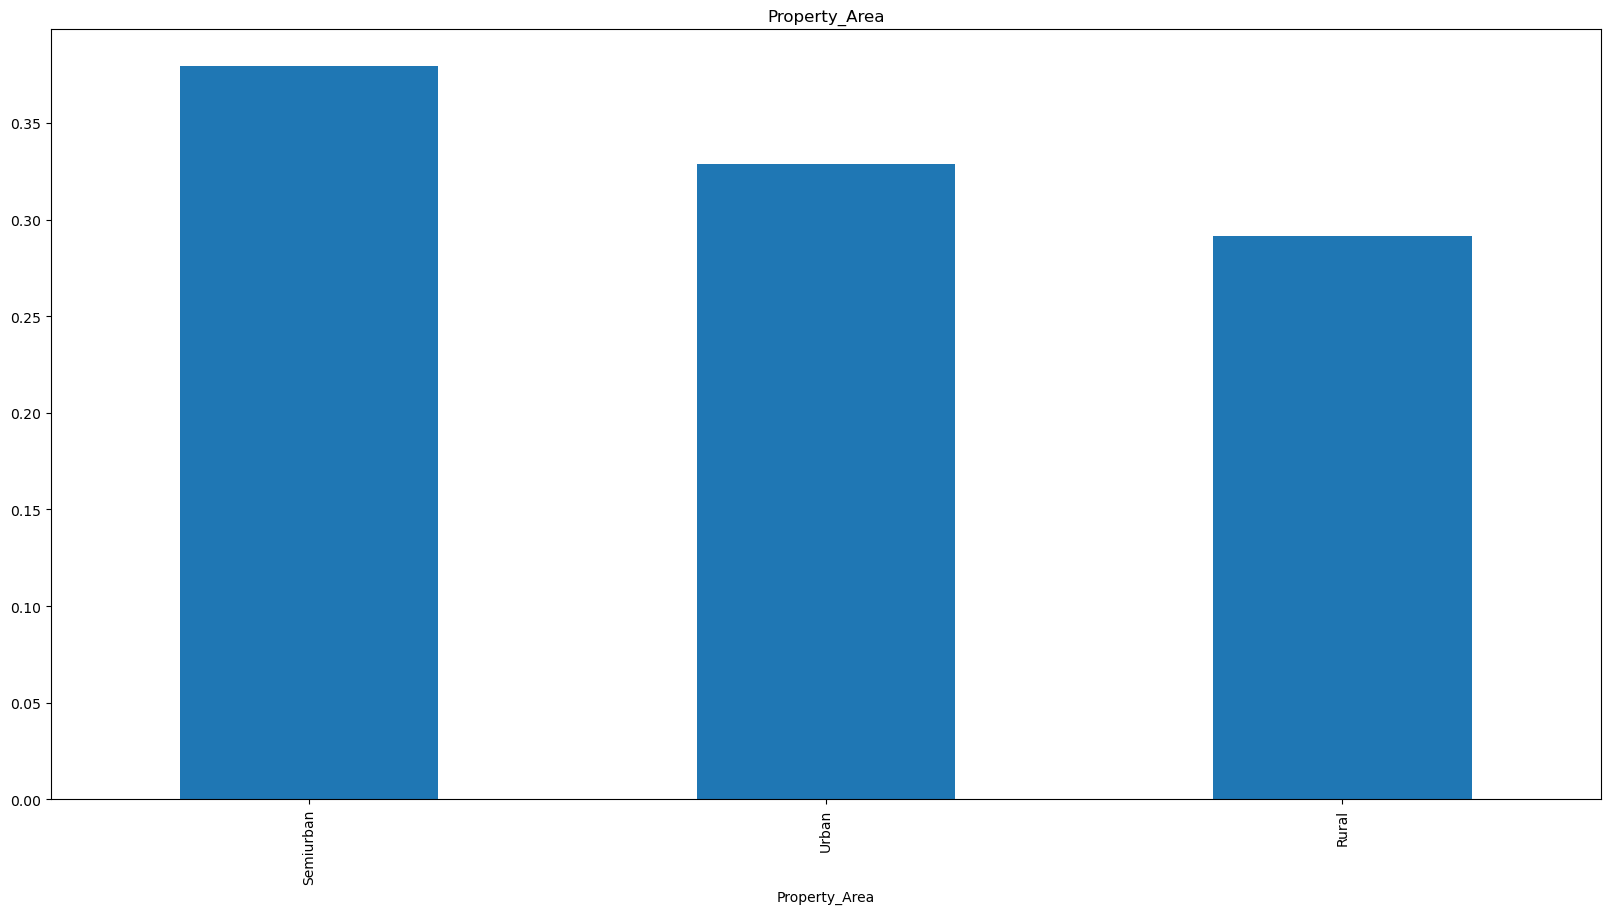

In [12]:
train['Property_Area'].value_counts(normalize=True).plot.bar(figsize = (20,10), title = 'Property_Area')

# Univariate Analysis

/var/folders/ys/9d4hnjr578x756qbqbyq9n000000gn/T/ipykernel_2607/4205472628.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['ApplicantIncome'])


<Axes: xlabel='ApplicantIncome', ylabel='Density'>

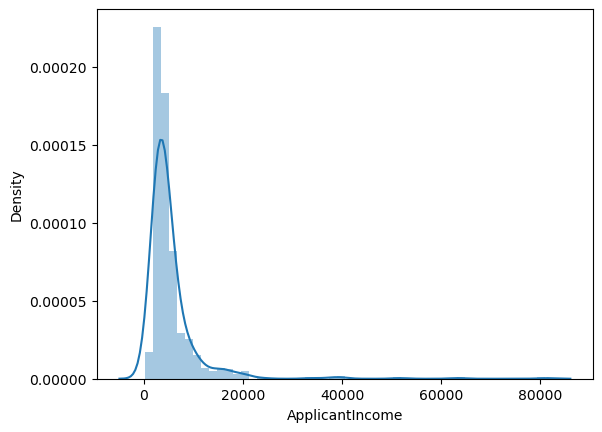

In [13]:
sns.distplot(train['ApplicantIncome'])

<Axes: >

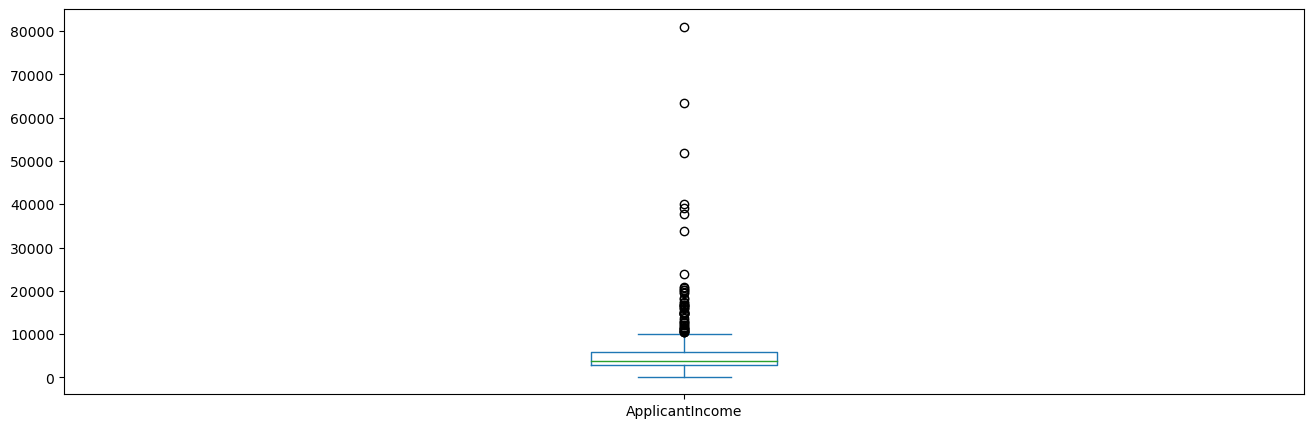

In [14]:
train['ApplicantIncome'].plot.box(figsize = (16,5))

/var/folders/ys/9d4hnjr578x756qbqbyq9n000000gn/T/ipykernel_2607/3189395263.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['LoanAmount'])


<Axes: xlabel='LoanAmount', ylabel='Density'>

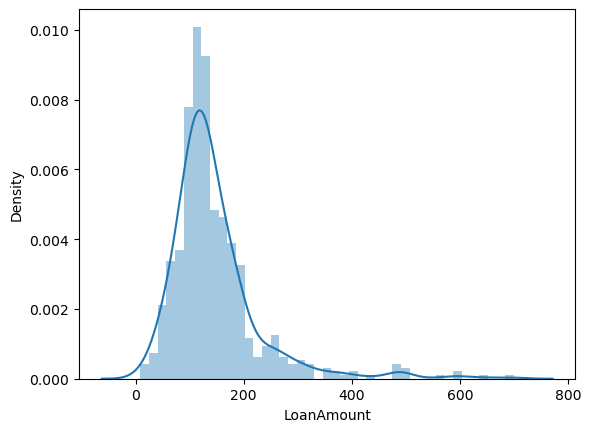

In [15]:
sns.distplot(train['LoanAmount'])

<Axes: >

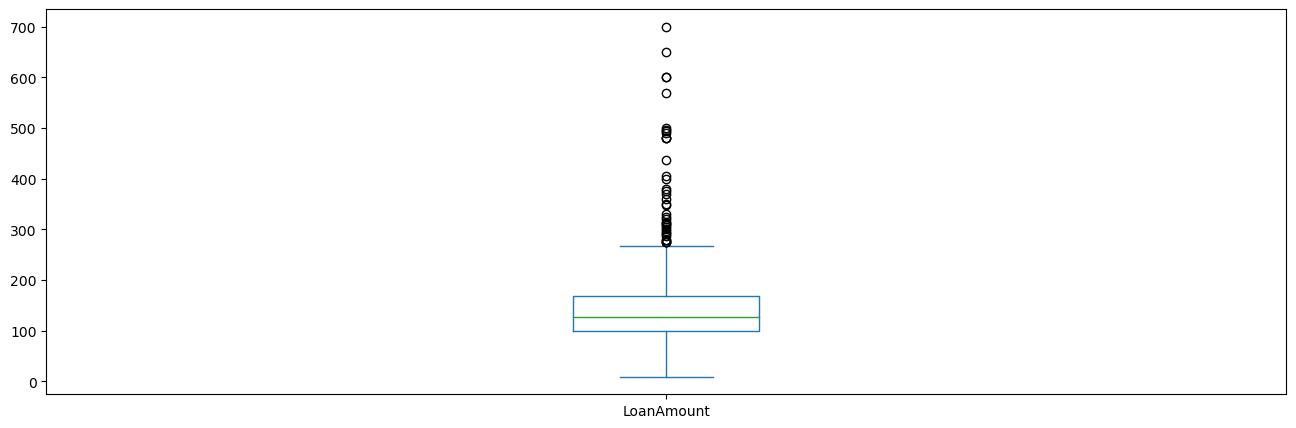

In [16]:
train['LoanAmount'].plot.box(figsize = (16,5))

# Bivariate Analysis

In [17]:
Gender = pd.crosstab(train['Gender'], train['Loan_Status'])
Gender
# Gender_normalized = Gender.div(Gender.sum(1).astype(float), axis=0)
# Gender_normalized.plot(kind="bar", stacked=True, figsize=(4,4))

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


<Axes: xlabel='Married'>

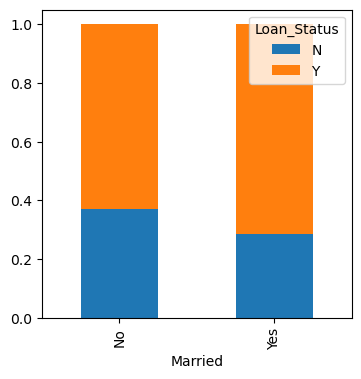

In [18]:
Married = pd.crosstab(train['Married'], train['Loan_Status'])
Married_normalized = Married.div(Married.sum(1).astype(float), axis = 0)
Married_normalized.plot(kind = 'bar', stacked = True, figsize = (4,4))

<Axes: xlabel='Education'>

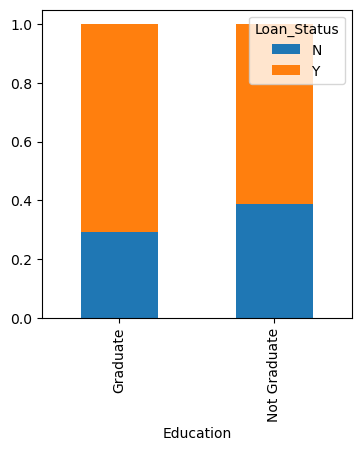

In [19]:
Education = pd.crosstab(train['Education'], train['Loan_Status'])
Education_normalized = Education.div(Education.sum(1).astype(float), axis = 0)
Education_normalized.plot(kind = 'bar', stacked = True, figsize = (4,4))

<Axes: xlabel='Dependents'>

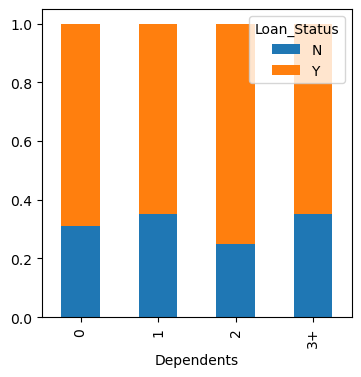

In [20]:
Dependents = pd.crosstab(train['Dependents'], train['Loan_Status'])
Dependents_normalized = Dependents.div(Dependents.sum(1).astype(float), axis = 0)
Dependents_normalized.plot(kind = 'bar', stacked = True, figsize = (4,4))

<Axes: xlabel='Self_Employed'>

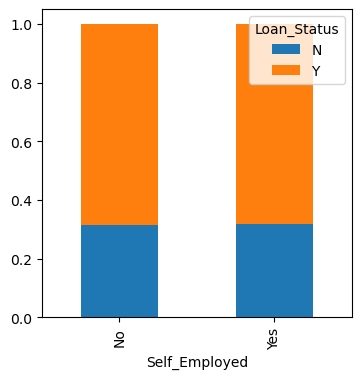

In [21]:
Self_employed = pd.crosstab(train['Self_Employed'], train['Loan_Status'])
Self_employed_normalized = Self_employed.div(Self_employed.sum(1).astype(float), axis = 0)
Self_employed_normalized.plot(kind = 'bar', stacked = True, figsize = (4,4))

<Axes: xlabel='Credit_History'>

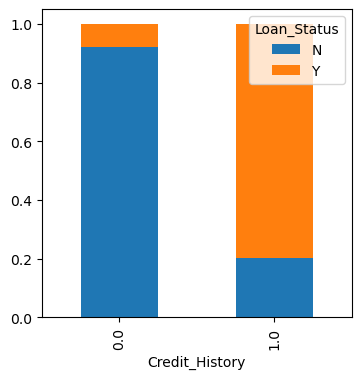

In [22]:
Credit_history = pd.crosstab(train['Credit_History'], train['Loan_Status'])
Credit_history_normalized = Credit_history.div(Credit_history.sum(1).astype(float), axis = 0)
Credit_history_normalized.plot(kind = 'bar', stacked = True, figsize = (4,4))

<Axes: xlabel='Property_Area'>

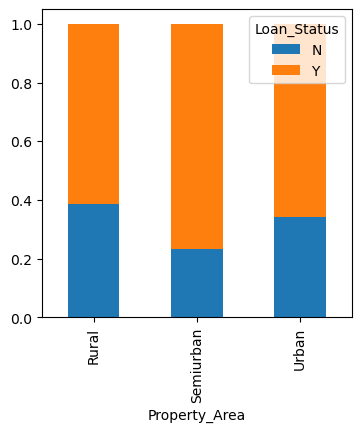

In [23]:
Property_Area = pd.crosstab(train['Property_Area'], train['Loan_Status'])
Property_Area_normalized = Property_Area.div(Property_Area.sum(1).astype(float), axis = 0)
Property_Area_normalized.plot(kind = 'bar', stacked = True, figsize = (4,4))

<Axes: xlabel='Loan_Status'>

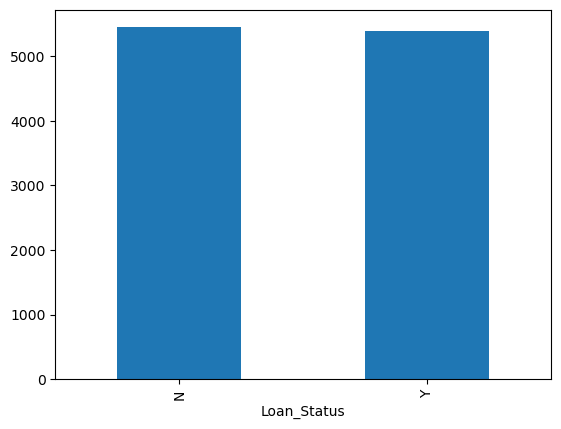

In [24]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

<Axes: xlabel='Income_bin'>

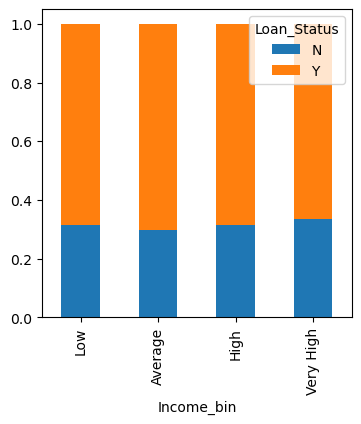

In [25]:
## As the mean income for both the Loan statuses are almost similar, we will make the bins for applicant income and analyse the Loan status corresponding to each income bin
bins = [0, 2500, 4000, 6000, 81000]
group = ['Low', 'Average', 'High', 'Very High']
train['Income_bin'] = pd.cut(train['ApplicantIncome'], bins, labels = group)

Income_bin = pd.crosstab(train['Income_bin'], train['Loan_Status'])
Income_bin_normalized = Income_bin.div(Income_bin.sum(1).astype(float), axis = 0)
Income_bin_normalized.plot(kind = 'bar', stacked = True, figsize = (4,4))

<Axes: xlabel='Coapplicant_Income_bin'>

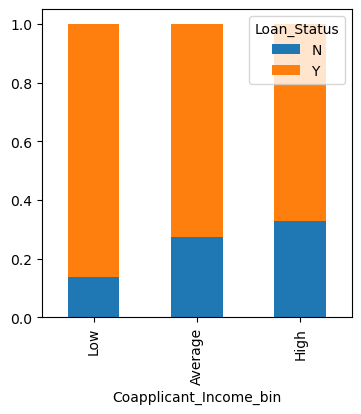

In [26]:
bins = [0, 1000, 3000, 42000]
group = ['Low', 'Average', 'High']
train['Coapplicant_Income_bin'] = pd.cut(train['CoapplicantIncome'], bins, labels = group)

Coapplicant_Income_bin = pd.crosstab(train['Coapplicant_Income_bin'], train['Loan_Status'])
Coapplicant_Income_bin_normalized = Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis = 0)
Coapplicant_Income_bin_normalized.plot(kind = 'bar', stacked = True, figsize = (4,4))

<Axes: xlabel='Total_income_bin'>

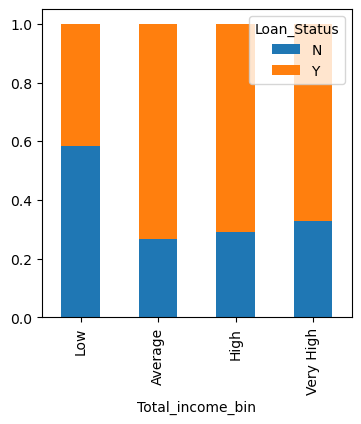

In [27]:
train['Total_income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
bins = [0, 2500, 4000, 6000, 81000]
group = ['Low', 'Average', 'High', 'Very High']
train['Total_income_bin'] = pd.cut(train['Total_income'], bins, labels = group)

Total_income_bin = pd.crosstab(train['Total_income_bin'], train['Loan_Status'])
Total_income_bin_normalized = Total_income_bin.div(Total_income_bin.sum(1).astype(float), axis = 0)
Total_income_bin_normalized.plot(kind = 'bar', stacked = True, figsize = (4,4))

<Axes: xlabel='LoanAmount_bin'>

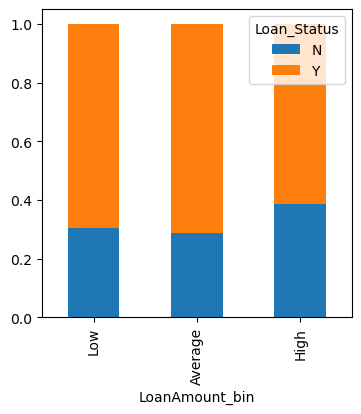

In [28]:
bins = [0,100,200,700]
group = ['Low', 'Average', 'High']
train['LoanAmount_bin'] = pd.cut(train['LoanAmount'], bins, labels = group)

LoanAmount_bin = pd.crosstab(train['LoanAmount_bin'], train['Loan_Status'])
LoanAmount_bin_normalized = LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis = 0)
LoanAmount_bin_normalized.plot(kind = 'bar', stacked = True, figsize = (4,4))

In [29]:
train = train.drop(['Income_bin', 'Coapplicant_Income_bin',
 'LoanAmount_bin', 'Total_income_bin', 'Total_income'], axis=1)

# Missing Value and Outlier Treatment

### Missing Values

In [30]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [31]:
train['Gender'] = train['Gender'].fillna(train['Gender'].mode()[0])
train['Married'] = train['Married'].fillna(train['Married'].mode()[0])
train['Dependents'] = train['Dependents'].fillna(train['Dependents'].mode()[0])
train['Self_Employed'] = train['Self_Employed'].fillna(train['Self_Employed'].mode()[0])
train['Credit_History'] = train['Credit_History'].fillna(train['Credit_History'].mode()[0])


#train['Gender'].fillna(train['Gender'].mode()[0], inplace = True)
#train['Married'].fillna(train['Married'].mode()[0], inplace = True)
#train['Dependents'].fillna(train['Dependents'].mode()[0], inplace = True)
#train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace = True)
# train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace = True)

In [32]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [33]:
train['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [34]:
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0])
train['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [35]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [36]:
train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].median())

In [37]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [38]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True) 
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True) 
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

### Outlier Treatment

<Axes: >

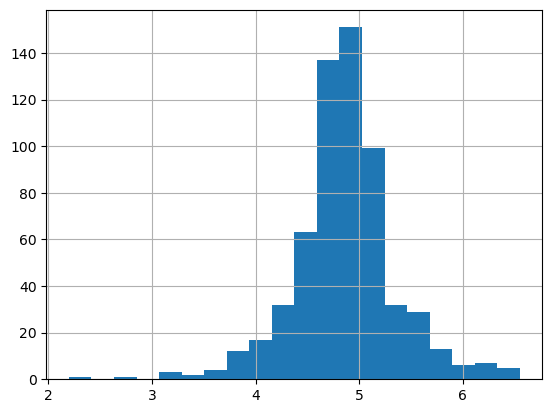

In [39]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins = 20)

In [40]:
test['LoanAmount_log'] = np.log(test['LoanAmount'])

# Model building

In [41]:
# We drop the Loan ID column as it doesn't have any effect on the loan status, we do that for train as well as test data
train = train.drop('Loan_ID', axis = 1)
test = test.drop('Loan_ID', axis = 1)

In [42]:
# As sklearn library requires the target variable in a separate dataset, we drop the 'Loan_Status' from our training dataset and store it in some other DB
x = train.drop('Loan_Status', axis = 1)
y = train['Loan_Status']

In [43]:
# We have to get the dummy variables for our categorical variables
x = pd.get_dummies(x)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

### Now we train our model on training data and make predictions for testing data. To validate our predictions, we divide our data into two parts: train and validation. We train our model using the training dataset and using that make predictions for the validation dataset. In this way, we can validate our predictions as we have true predictions for the validation part, that we don't have for our test data.

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(x, y, test_size = 0.3)

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [46]:
model = LogisticRegression()
model.fit(x_train, y_train)

/Users/divyankchaudhary/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
pred_cv = model.predict(x_cv)

In [48]:
accuracy_score(y_cv, pred_cv)

0.8108108108108109

In [49]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

In [50]:
cm = confusion_matrix(y_cv, pred_cv)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 27  28]
 [  7 123]]


In [51]:
precision = precision_score(y_cv, pred_cv, pos_label='Y')
recall = recall_score(y_cv, pred_cv, pos_label='Y')
f1 = f1_score(y_cv, pred_cv, pos_label='Y')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Precision: 0.81
Recall: 0.95
F1-Score: 0.88


### Therefore, our predictions are almost 82% correct.

In [52]:
pred_test = model.predict(test)
pred_test

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

# Logistic Regression using stratified k-folds cross-validation

In [53]:
from sklearn.model_selection import StratifiedKFold

In [54]:
i = 1
kf = StratifiedKFold(n_splits = 5, random_state = 1, shuffle = True)
# Random state set to 1 implies that the identical samples can be produced again
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
# kf split generates indices to split the split data into training and validation sets, therefore we equate them to index

for train_index, test_index in kf.split(x, y):
    print('{} of kfold {}'.format(i, kf.n_splits))
# format is used above to assign the values in curly brackets
    xtr, xvl = x.iloc[train_index], x.iloc[test_index]
    ytr, yvl = y.iloc[train_index], y.iloc[test_index]
    
    model = LogisticRegression(random_state = 1)
    model.fit(xtr, ytr)
    
    pred_test = model.predict(xvl)
    score = accuracy_score(pred_test, yvl)
    print('accuracy_score', score)
    precision = precision_score(yvl, pred_test, pos_label='Y')
    recall = recall_score(yvl, pred_test, pos_label='Y')
    f1 = f1_score(yvl, pred_test, pos_label='Y')
    accuracy_list.append(score)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    
    i= i + 1
    
print(f"\nAverage Accuracy: {sum(accuracy_list)/kf.n_splits:.2f}")
print(f"Average Precision: {sum(precision_list)/kf.n_splits:.2f}")
print(f"Average Recall: {sum(recall_list)/kf.n_splits:.2f}")
print(f"Average F1-Score: {sum(f1_list)/kf.n_splits:.2f}")


/Users/divyankchaudhary/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/divyankchaudhary/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

1 of kfold 5
accuracy_score 0.8048780487804879
Precision: 0.81
Recall: 0.93
F1-Score: 0.87
2 of kfold 5
accuracy_score 0.8373983739837398
Precision: 0.81
Recall: 1.00
F1-Score: 0.89
3 of kfold 5
accuracy_score 0.7804878048780488
Precision: 0.77
Recall: 0.96
F1-Score: 0.86
4 of kfold 5
accuracy_score 0.7886178861788617
Precision: 0.80
Recall: 0.93
F1-Score: 0.86
5 of kfold 5
accuracy_score 0.7950819672131147
Precision: 0.78
Recall: 0.99
F1-Score: 0.87

Average Accuracy: 0.80
Average Precision: 0.79
Average Recall: 0.96
Average F1-Score: 0.87


In [55]:
# Fit the final model on the entire dataset
final_model = LogisticRegression(random_state=1)
final_model.fit(x_train, y_train)

/Users/divyankchaudhary/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

In [56]:
pred_test = final_model.predict(test)
print(pred_test)

['Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'N' 'Y'
 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y'
 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'N' 'Y'
 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y'
 'Y' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'N' 'Y

# Decision Tree

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [58]:
xdt_train, xdt_test, ydt_train, ydt_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [59]:
DT = DecisionTreeClassifier(criterion= 'entropy', random_state=100, max_depth=3, min_samples_leaf=5)
DT.fit(xdt_train, ydt_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [60]:
ydt_pred = DT.predict(xdt_test)
ydt_pred

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y

In [62]:
accuracy = accuracy_score(ydt_pred, ydt_test)
accuracy

0.745945945945946

In [63]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

In [64]:
print(ydt_test)

253    Y
506    Y
365    N
265    Y
260    Y
      ..
368    Y
98     Y
310    Y
335    Y
302    Y
Name: Loan_Status, Length: 185, dtype: object


In [65]:
cm = confusion_matrix(ydt_test, ydt_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 25  38]
 [  9 113]]


In [66]:
precision = precision_score(ydt_test, ydt_pred, pos_label='Y')
recall = recall_score(ydt_test, ydt_pred, pos_label='Y')
f1 = f1_score(ydt_test, ydt_pred, pos_label='Y')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Precision: 0.75
Recall: 0.93
F1-Score: 0.83


# Random Forest

In [69]:
# Initialize the Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [71]:
# Train the classifier
clf.fit(xdt_train, ydt_train)

RandomForestClassifier(random_state=42)

In [72]:
# Make predictions
y_pred = clf.predict(xdt_test)

In [74]:
accuracy = accuracy_score(y_pred, ydt_test)
accuracy

0.7621621621621621

In [75]:
cm = confusion_matrix(ydt_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 31  32]
 [ 12 110]]


In [76]:
precision = precision_score(ydt_test, y_pred, pos_label='Y')
recall = recall_score(ydt_test, y_pred, pos_label='Y')
f1 = f1_score(ydt_test, y_pred, pos_label='Y')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Precision: 0.77
Recall: 0.90
F1-Score: 0.83


# Tuning the model

In [77]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [79]:
# Initialize GridSearchCV
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

In [81]:
# Fit the model to the training data
grid_search.fit(xdt_train, ydt_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [82]:
# Get the best parameters and estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")

Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}


In [87]:
# Make predictions with the best estimator
y_best_pred = best_estimator.predict(xdt_test)

In [88]:
# Evaluate the model
accuracy = accuracy_score(ydt_test, y_best_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.77


In [89]:
cm = confusion_matrix(ydt_test, y_best_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 25  38]
 [  4 118]]


In [90]:
precision = precision_score(ydt_test, y_best_pred, pos_label='Y')
recall = recall_score(ydt_test, y_best_pred, pos_label='Y')
f1 = f1_score(ydt_test, y_best_pred, pos_label='Y')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Precision: 0.76
Recall: 0.97
F1-Score: 0.85
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] EN

[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_sa

[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samp

[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_sampl

[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_sam